In [1]:
from clifford import make, draw, run
from clifford import entropy, clipped_gauge, B, counts_B, entropy_B
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
n_qubits = 10
T = 4
p = 0.06
shots = 1

In [3]:
cliffords = []
print("Generating and simulating circuits:")
for _ in tqdm(range(shots)):
    circ = make(n_qubits, T, p, save_intermediate = False)
    # draw(circ)
    result = run(circ, shots = 1)
    cliffords.append(result.data()['t'+str(2*T-1)][0].stab.astype(int)) # Append the final state stabilizer matrix

Generating and simulating circuits:


100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


In [4]:
print("Calculating entropies:")
S = [entropy(cliff, n_qubits // 2) for cliff in tqdm(cliffords)]
# np.savetxt("S_{}_{}_{}_{}.out".format(n_qubits, T, p, shots), S)

Calculating entropies:


100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


In [5]:
S_B = [entropy_B(B(clipped_gauge(cliff)), n_qubits // 2) for cliff in tqdm(cliffords)]

100%|██████████| 1/1 [00:00<00:00, 111.52it/s]


In [6]:
cliff = cliffords[0]

In [8]:
counts_B(B(clipped_gauge(cliff)))

array([[2, 0, 2],
       [2, 0, 2],
       [1, 1, 2],
       [2, 0, 2],
       [1, 0, 1],
       [0, 0, 0],
       [0, 5, 5],
       [1, 0, 1],
       [0, 3, 3],
       [1, 1, 2]])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <BarContainer object of 10 artists>)

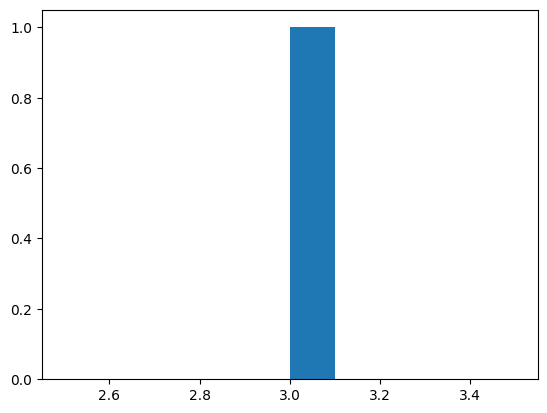

In [9]:
plt.hist(S)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 10 artists>)

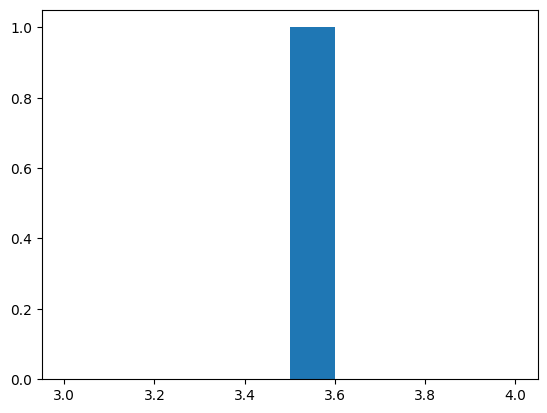

In [10]:
plt.hist(S_B)